# PCA

# Principal Component Analysis is used to reduce the number of features (variables, dimensions) in a large dataset 

# I recommend that should do this for only two main reasons: (1) To make algorithms run faster and (2) To allow for easier visualization [in typically two or maybe three dimensions]


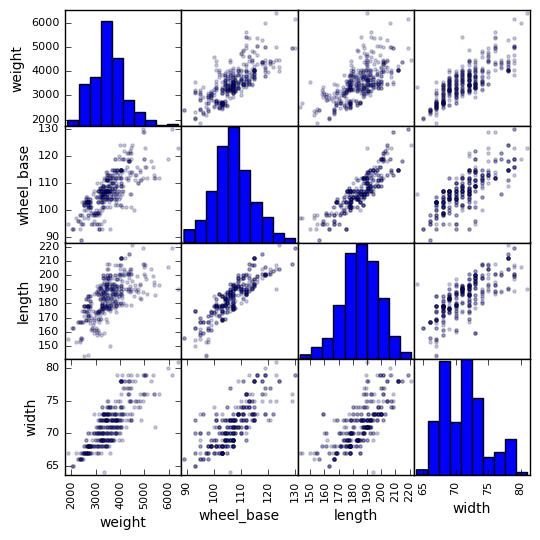

In [2]:
import numpy as pd
import pandas as pd
import matplotlib.pylab as plt

# Read in data from a file as 7 columns of numeric data into a dataframe
# The columns in the data file are data on 2004 new cars: horsepower, city mpg, 
# highway mpg, weight, wheel base width, length and width
# First read this into a pandas dataframe
alldata = pd.read_csv('carsdataonly',delim_whitespace=True,header=None)
# Make sure all is recast as floats - data looks like integers in file
alldata = alldata.astype(float)
# Make new dataframe with only the last four columns - weight, wheel base, length, width
weight_base_length_width = alldata[[3,4,5,6]].copy()
# Add column names to dataframe
weight_base_length_width.columns = ['weight', 'wheel_base', 'length','width']
# Use can the pandas scatter matrix plot method to get a quick view of variables and correlations
# We can see that variables are quite well correlated; we could perhaps get away with using less features
# or a lower number of new features constructed from the old features.
# Note that if we had hundreds of features we probably would not do this pandas scatter plot!!
pd.scatter_matrix(weight_base_length_width, alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

In [3]:
# We need to import the PCA library from scikit learn library
from sklearn.decomposition import PCA

# Normalizing (scaling) the data is VERY important - indeed can be important to many machine learning algorithms.
# We take our original features and scale them so that they all have zero mean and unit variance
from sklearn import preprocessing
# Create a new scaled data object from the original data
ds = preprocessing.scale(weight_base_length_width)
#Put this in a pandas dataframe
data_scaled = pd.DataFrame(ds,columns = weight_base_length_width.columns)

# Perform PCA to reduce to N components
N = 2
pca = PCA(n_components=N)
XR = pca.fit_transform(data_scaled)
indexnames = []
for i in range(N):
    indexnames.append('PC-'+str(i+1))

# Put Principal Components in Dataframe and print 
# Note need to change index depending on how many components you have chosen - this is set for three 
Principle_component_coefficents =  pd.DataFrame(pca.components_,columns=data_scaled.columns,index=indexnames)
#print Principle_component_coefficents

print('=========================')
print('Explained variance ratios')
print('=========================')
print(pca.explained_variance_ratio_)
print 'First principal component explains ', 100*pca.explained_variance_ratio_[0], ' % of the variance'

print('=======================')
print('header of original data')
print('=======================')
print weight_base_length_width.head()
print('=======================')
print('header of scaled data')
print('=======================')
print data_scaled.head()
print('==========================')
print('First five rows of PC data')
print('==========================')
print XR[0:5,:]

Explained variance ratios
[ 0.82343483  0.0987685 ]
First principal component explains  82.3434830121  of the variance
header of original data
   weight  wheel_base  length  width
0  2370.0        98.0   167.0   66.0
1  2348.0        98.0   153.0   66.0
2  2617.0       104.0   183.0   69.0
3  2676.0       104.0   183.0   68.0
4  2617.0       104.0   183.0   69.0
header of scaled data
     weight  wheel_base    length     width
0 -1.648663   -1.301593 -1.358551 -1.568528
1 -1.679865   -1.301593 -2.417481 -1.568528
2 -1.298354   -0.453823 -0.148344 -0.676725
3 -1.214677   -0.453823 -0.148344 -0.973993
4 -1.298354   -0.453823 -0.148344 -0.676725
First five rows of PC data
[[-2.93412654 -0.30360049]
 [-3.47566617  0.31002118]
 [-1.2785466  -0.80485325]
 [-1.38741669 -0.85102858]
 [-1.2785466  -0.80485325]]


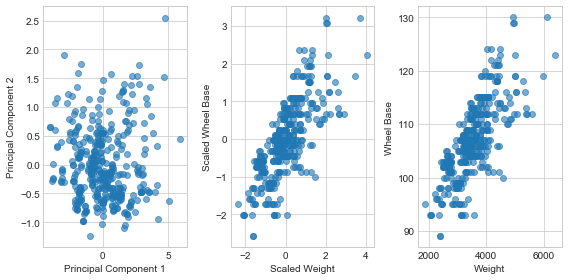

In [3]:
import seaborn as sns

# Put scaled data in an array for useful plotting
w_b_l_w_scaled = data_scaled.values
w_b_l_w_unscaled = weight_base_length_width.values

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 4))
    #plt.figure
    
    plt.subplot(1,3,1)
    plt.scatter(XR[:,0],
                    XR[:,1],alpha=0.6
               )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,2)
    plt.scatter(w_b_l_w_scaled[:,0],
                    w_b_l_w_scaled[:,1],alpha=0.6
               )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    plt.xlabel('Scaled Weight')
    plt.ylabel('Scaled Wheel Base')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,3)
    plt.scatter(w_b_l_w_unscaled[:,0],
                    w_b_l_w_unscaled[:,1],alpha=0.6
               )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    plt.xlabel('Weight')
    plt.ylabel('Wheel Base')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    #plt.subplot(1,4,4)
    #plt.scatter(w_b_l_w[:,0],
    #                w_b_l_w[:,1],alpha=0.6
    #           )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    #plt.xlabel('Weight')
    #plt.ylabel('Wheel Base')
    #plt.legend(loc='lower center')
    #plt.tight_layout()
    
    plt.show()

#### 